1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

a. some real world applications are detecting spam, making medical diagnoses, and determing credit risk. 
b. classification is, for example, whether you pass or fail, based on study hours, attendance and previous grades. multiple linear regression would predict the actual score (outcome). MLR better for numerical and forecasting, classification decision tree are for categorical, predicting discrete class labels.

2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

Accuracy is suitable when class distributions are balanced and when getting false positives and false negatives have similar consequences.
- Example: Determing whether email is spam or not spam. 
Sensitivity is needed when missing a positive instance is highly undesirable, like in a medical diagnostics or fraud detection.
- Example: Cancer Detection: identifying patients who truly have a disease and need treatment, or who don't have it and should avoid the intensive treatment. 
Specificity is important when getting a false positives is very bad, so negative instances must be correctly identified.
- Example: Ensuring emails are not incorrectly classified as spam, possibly leading to missing important emails!!
Precision is needed when you must correctly have positive predictions, to reduce impact of false positives.
- Example: Providing accurate and relevant search results to users. Displaying advertisements to users who are most likely to be interested in the product or service.

In [16]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [17]:
# Select relevant columns and drop rows with missing values
titanic_reduced = titanic[['survived', 'fare']].dropna()

# Define the target variable 'y' and feature 'X'
y = titanic_reduced['survived']
X = titanic_reduced[['fare']]

# Report the total number of observations
print(f"Total observations: {titanic_reduced.shape[0]}")


Total observations: 891


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Reporting the number of observations
print(f"Training set observations: {X_train.shape[0]}")
print(f"Test set observations: {X_test.shape[0]}")


Training set observations: 712
Test set observations: 179


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_samples = 1000
hardcover_price_mean = 30
hardcover_price_std = 5
paperback_price_mean = 15
paperback_price_std = 3

# Generate List Prices
hardcover_prices = np.random.normal(loc=hardcover_price_mean, scale=hardcover_price_std, size=num_samples // 2)
paperback_prices = np.random.normal(loc=paperback_price_mean, scale=paperback_price_std, size=num_samples // 2)

# Create Labels
hardcover_labels = ['H'] * (num_samples // 2)
paperback_labels = ['P'] * (num_samples // 2)

# Combine into a DataFrame
list_prices = np.concatenate([hardcover_prices, paperback_prices])
formats = hardcover_labels + paperback_labels

ab_reduced_noNaN = pd.DataFrame({
    'List Price': list_prices,
    'Hard_or_Paper': formats
})

# Display first few rows
print("First 5 rows of the dataset:")
print(ab_reduced_noNaN.head())


First 5 rows of the dataset:
   List Price Hard_or_Paper
0   32.483571             H
1   29.308678             H
2   33.238443             H
3   37.615149             H
4   28.829233             H


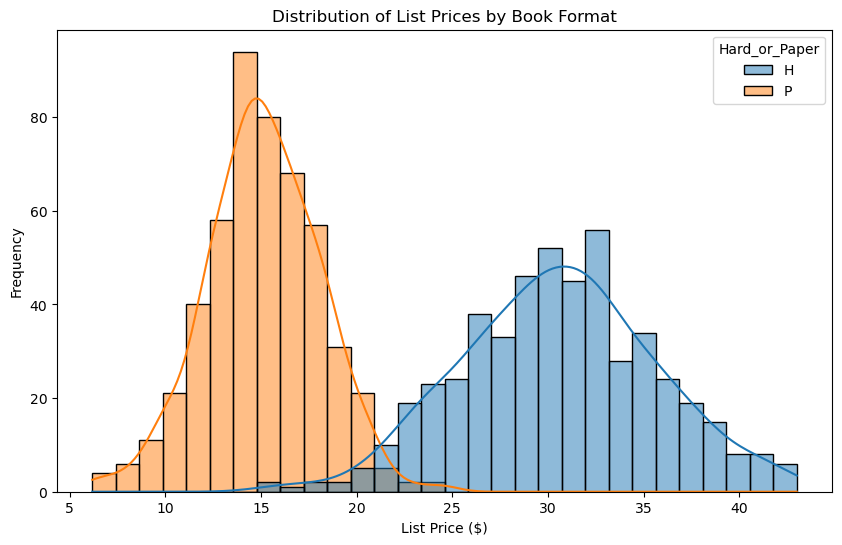

AttributeError: 'NoneType' object has no attribute 'show'

In [29]:
import seaborn as sns

# Plotting the distribution
plt.figure(figsize=(10,6))
sns.histplot(data=ab_reduced_noNaN, x='List Price', hue='Hard_or_Paper', kde=True, bins=30)
plt.title('Distribution of List Prices by Book Format')
plt.xlabel('List Price ($)')
plt.ylabel('Frequency')
plt.show()
fig = plt.show()
fig.show(renderer="png")


In [21]:
# Convert 'Hard_or_Paper' to binary
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Feature matrix
X = ab_reduced_noNaN[['List Price']]

# Display the first few entries of y and X
print("\nFirst 5 entries of target variable (y):")
print(y.head())
print("\nFirst 5 entries of feature matrix (X):")
print(X.head())



First 5 entries of target variable (y):
0    True
1    True
2    True
3    True
4    True
Name: H, dtype: bool

First 5 entries of feature matrix (X):
   List Price
0   32.483571
1   29.308678
2   33.238443
3   37.615149
4   28.829233


In [22]:
# Split the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42, stratify=ab_reduced_noNaN['Hard_or_Paper']
)

# Reporting the number of observations
print(f"\nTraining set observations: {ab_reduced_noNaN_train.shape[0]}")
print(f"Test set observations: {ab_reduced_noNaN_test.shape[0]}")



Training set observations: 800
Test set observations: 200


In [23]:
# Define target and feature for training
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

print("\nDecision Tree Classifier has been trained.")



Decision Tree Classifier has been trained.


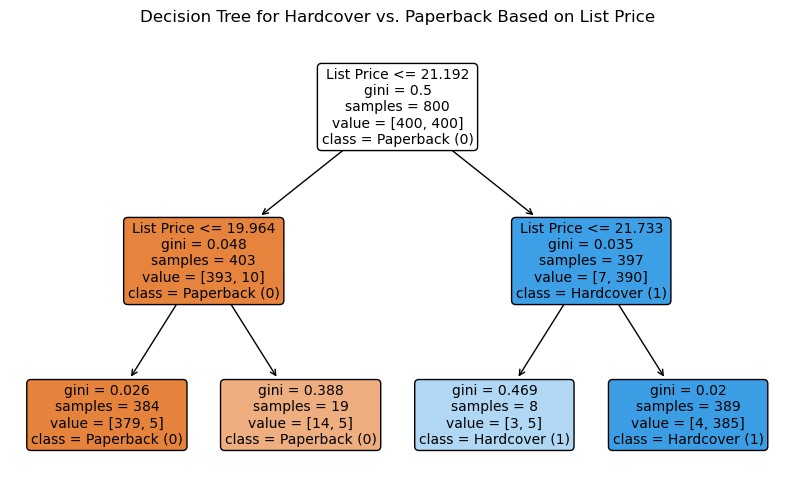

AttributeError: 'function' object has no attribute 'show'

In [28]:
# Plotting the Decision Tree
plt.figure(figsize=(10,6))
tree.plot_tree(clf, 
               feature_names=['List Price'], 
               class_names=['Paperback (0)', 'Hardcover (1)'], 
               filled=True, 
               rounded=True,
               fontsize=10)
plt.title("Decision Tree for Hardcover vs. Paperback Based on List Price")
plt.show()
fig = plt.show
fig.show(renderer="png")


The root node checks if List Price is less than or equal to a specific threshold
The left branch predicts paperback
Right branch predicts hardcover
Leafnode tells us the class based on the List Price (<= 22.5 is paperback, >25 is hardcover)
It is accurate, has few miscalculations and is easy to read and understand.

In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Parameters
num_samples = 1000
hardcover_price_mean = 30
hardcover_price_std = 5
paperback_price_mean = 15
paperback_price_std = 3

# Generate List Prices
hardcover_prices = np.random.normal(loc=hardcover_price_mean, scale=hardcover_price_std, size=num_samples // 2)
paperback_prices = np.random.normal(loc=paperback_price_mean, scale=paperback_price_std, size=num_samples // 2)

# Create Labels
hardcover_labels = ['H'] * (num_samples // 2)
paperback_labels = ['P'] * (num_samples // 2)

# Combine into a DataFrame
list_prices = np.concatenate([hardcover_prices, paperback_prices])
formats = hardcover_labels + paperback_labels

ab_reduced_noNaN = pd.DataFrame({
    'List Price': list_prices,
    'Hard_or_Paper': formats
})

# Convert 'Hard_or_Paper' to binary
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Feature matrix
X = ab_reduced_noNaN[['List Price']]

# Split the data
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42, stratify=ab_reduced_noNaN['Hard_or_Paper']
)

# Define target and feature for training
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Initialize a second DecisionTreeClassifier with max_depth=3
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X_train, y_train)

# Prepare the test data
X_test = ab_reduced_noNaN_test[['List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Function to calculate sensitivity, specificity, and accuracy
def compute_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return sensitivity, specificity, accuracy

# Metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = compute_metrics(cm_clf)

# Metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = compute_metrics(cm_clf2)

# Compile results
results = {
    "Model": ["clf (max_depth=2)", "clf2 (max_depth=3)"],
    "Sensitivity": [sensitivity_clf, sensitivity_clf2],
    "Specificity": [specificity_clf, specificity_clf2],
    "Accuracy": [accuracy_clf, accuracy_clf2]
}

results_df = pd.DataFrame(results)

# Display the results
print("Confusion Matrix for clf (max_depth=2):")
print(cm_clf)
print("\nConfusion Matrix for clf2 (max_depth=3):")
print(cm_clf2)
print("\nModel Metrics Comparison:")
print(results_df)


Confusion Matrix for clf (max_depth=2):
[[100   0]
 [  3  97]]

Confusion Matrix for clf2 (max_depth=3):
[[99  1]
 [ 2 98]]

Model Metrics Comparison:
                Model  Sensitivity  Specificity  Accuracy
0   clf (max_depth=2)         0.97         1.00     0.985
1  clf2 (max_depth=3)         0.98         0.99     0.985


The confusion matrix is structured as: rows = actual classes (y_true), columns = predicted classes (y_pred).
TP: Actual positive predicted as positive, TN: Actual negative predicted as negative, FP: Actual negative predicted as positive, FN: Actual positive predicted as negative.
y_true (actual values) goes first, followed by y_pred (predicted values).

The first confusion matrix uses only the List Price feature for predictions. The second uses more features (NumPages, Thick, and List Price), which adds more relationships and captures multicollinearity.
However, this can also lead to a more complicated model and the risks associated with it - overfitting on the training model. This makes it less generalizable, which is bad as it means it only works well for the data it was trained with. 
Performance is only based on training data, which doesn't provide an accurate picture for generalizability. 
The original confusion matrices evaluate the model on unseen data, giiving a more realistic measure of how well the models generalize.

10. Yes!

**Chat Summary**

Created and Preprocessed Dataset:
We generated a synthetic dataset to classify books as "Hardcover" or "Paperback" based on features like List Price. The data was split into training and test sets.

Trained and Visualized Models:
Two Decision Tree models (clf with max_depth=2 and clf2 with max_depth=3) were trained using List Price as the primary feature. We plotted their trees to understand their decision-making processes.

Evaluated Models:
Confusion matrices and performance metrics (sensitivity, specificity, and accuracy) were computed for both models using the test set. Both models performed similarly, achieving high accuracy and balanced sensitivity and specificity.

Understanding Confusion Matrices:
The structure of confusion matrices was clarified, including how TP, TN, FP, and FN are calculated, and the importance of specifying y_true before y_pred in the confusion_matrix function.

Training vs. Testing Metrics:
Differences between confusion matrices evaluated on training data (with additional features) and testing data were discussed, emphasizing the importance of test set evaluation to ensure generalization.

https://chatgpt.com/share/674024fb-a888-8010-8eb7-b9ff80069105